In [1]:
import mne
import numpy as np
import glob
from past.builtins import unicode
import xlrd
import pandas as pd

In [2]:
#读取SE训练数据
data_dir_file=r"../SE_train_processed/"
train_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(train_data_file_path))

#读取SE测试数据
data_dir_file=r"../SE_test_processed/"
test_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(test_data_file_path))

211
31


In [3]:
# data_file_path

In [3]:
#发作为1；未发作为0
y_train=[]
for i in train_data_file_path:
    if i.find('未发作')==-1:
        # 找不到未发作，即发作，记为1
        y_train.append(1)
    else:
        y_train.append(0)
print(len(y_train))
print(sum(y_train))

#发作为1；未发作为0
y_test=[]
for i in test_data_file_path:
    if i.find('未发作')==-1:
        # 找不到未发作，即发作，记为1
        y_test.append(1)
    else:
        y_test.append(0)
print(len(y_test))
print(sum(y_test))

211
115
31
23


In [4]:
#每8s数据截成4段2s，所以y也要变成4*17倍长度
y_long_data=[]
for i in y_train:
    for j in range(4*15):
        y_long_data.append(i)
y_train=y_long_data
print(len(y_train))

12660


In [5]:
#每16s数据截成8段2s，所以y也要变成8*17倍长度
y_long_test_data=[]
for i in y_test:
    for j in range(8*15):
        y_long_test_data.append(i)
y_test=y_long_test_data
print(len(y_test))

3720


In [6]:
import scipy.signal
import scipy.io as scio    
channels_selected=15
samps = 2

In [7]:
#改成了8s的片段
x_train=[]
for i in train_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for k in range(channels_selected):
        data_channel = data[k]
        for j in range(0,8,samps):
            data_temp = data_channel[j*256:(j+samps)*256]
            x_train.append(data_temp)

Opening raw data file ../SE_train_processed\Z何富桂20220221_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.


<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220221_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)


Opening raw data file ../SE_train_processed\Z何富桂20220225_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220228_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220302_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何金蓓20220511_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何金蓓20220516（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何金蓓20220516（未发作）_bias_16.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何金蓓20220516（未发作）_bias_8.fif...
Isotrak

<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220225_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220228_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220302_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif

    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220311_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220314_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220316_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220318_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220309_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220311_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_trai

<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220311_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220314_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220316_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif

Opening raw data file ../SE_train_processed\Z刘浩天20220518（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘浩天20220520_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周博20220408_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周博20220415_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周博20220422_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220316_bias_0.fif...
Isotrak not found
   

<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z刘浩天20220518（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z刘浩天20220520_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z周博20220408_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw

Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220304_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z宋志辉20220318_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z宋志辉20220321_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z宋志辉20220323_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z宋志辉20220325_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw da

<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220228_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220302_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220304_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif

Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z李坤铣20220530（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z李振千20220608_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z李振千20220610_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z李振千20220613_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220316_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220318_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw

<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z李坤铣20220530（未发作）_bias_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z李坤铣20220530（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z李振千20220608_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.f

Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220228_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z柯志祥20220406_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z柯志祥20220411_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z柯志祥20220413_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z柯志祥20220420_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening r

<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220228_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z柯志祥20220406_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, ra

Opening raw data file ../SE_train_processed\Z沈祺雨20220518（未发作）_bias_16.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z沈祺雨20220518（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220318_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220321_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220323_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220325_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王文珊202203023_bias_0.fif...
Isotrak not

<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z沈祺雨20220518（未发作）_bias_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z沈祺雨20220518（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220318_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.f

Ready.
Opening raw data file ../SE_train_processed\Z王胜银20220516（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王胜银20220520_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王莹20220413_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王莹20220415_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王莹20220420_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王莹20220422_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z祁燕20220413_bias_0.fif...
Isotrak not foun

<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z王胜银20220516（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z王胜银20220520_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z王莹20220413_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw

    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z程婉君20220411_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220325_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220328_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）_bias_16.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data

<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z程婉君20220411_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220325_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220328_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif

Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z裴瑞婷20220427（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z裴瑞婷20220427（未发作）_bias_16.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z裴瑞婷20220427（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z赵丽兰20220225_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z赵丽兰20220228_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z赵丽兰20220302_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready

<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z裴瑞婷20220427（未发作）_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z裴瑞婷20220427（未发作）_bias_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z裴瑞婷20220427（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _i

Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z陈琳20220513（未发作）_bias_16.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z陈琳20220513（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z陈琳20220516（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z陈琳20220516（未发作）_bias_16.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z陈琳20220516（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z陈琳20220518（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 

<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z陈琳20220513（未发作）_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z陈琳20220513（未发作）_bias_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z陈琳20220513（未发作）_bias_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg

Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄晓旸20220511_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄晓旸20220513_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄晓旸20220516（未发作）_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄晓旸20220516（未发作）_bias_16.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄晓旸20220516（未发作）_bias_8.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220314_bias_0.fif...
Isotrak not found
    Range : 0 ... 2047 =      0.000 ...     7.996 secs
Ready

<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220328_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z黄晓旸20220511_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-7-7a7f1aab9c31>:4: RuntimeWarning: This filename (../SE_train_processed\Z黄晓旸20220513_bias_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.

In [8]:
#test仍然是16s
x_test=[]
for i in test_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for k in range(channels_selected):
        data_channel = data[k]
        for j in range(0,16,samps):
            data_temp = data_channel[j*256:(j+samps)*256]
            x_test.append(data_temp)

Opening raw data file ../SE_test_processed\Z南添仁20220509.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z南添仁20220511.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z南添仁20220513.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z南添仁20220516（未发作）.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z徐珍英20220218（未发作）.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z徐珍英20220221（未发作）.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z徐珍英20220223.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.

<ipython-input-8-cea321bc01b0>:4: RuntimeWarning: This filename (../SE_test_processed\Z南添仁20220509.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-cea321bc01b0>:4: RuntimeWarning: This filename (../SE_test_processed\Z南添仁20220511.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-cea321bc01b0>:4: RuntimeWarning: This filename (../SE_test_processed\Z南添仁20220513.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z王纯刚20220325.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z王纯刚20220328.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z陈倩20220420.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z陈倩20220422.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z陈倩20220425.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z陈倩20220427.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z魏平20220427.fif...
Isotrak not found
    

<ipython-input-8-cea321bc01b0>:4: RuntimeWarning: This filename (../SE_test_processed\Z王纯刚20220325.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-cea321bc01b0>:4: RuntimeWarning: This filename (../SE_test_processed\Z王纯刚20220328.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-8-cea321bc01b0>:4: RuntimeWarning: This filename (../SE_test_processed\Z陈倩20220420.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_

In [9]:
len(x_train) #17 * 92 * n段=1564 * n

12660

In [10]:
len(x_test)

3720

In [12]:
#不需要读入刺激参数
# path = "./SE_parameter/train_matched_stimulate_parameter.xlsx"
# df_train = pd.read_excel(path,engine='openpyxl')
# df_train=df_train.drop(['Unnamed: 0'],axis=1)
# df_train

In [13]:
# path = "./SE_parameter/test_matched_stimulate_parameter.xlsx"
# df_test = pd.read_excel(path,engine='openpyxl')
# df_test=df_test.drop(['Unnamed: 0'],axis=1)
# df_test

In [14]:
# 引入刺激参数
# ECT_code = []

# for i in range(df_train.shape[0]):
#     if df_train.iloc[i,0] == 1:
#         ECT_code.append([0,0])
#     if df_train.iloc[i,0] == 2:
#         ECT_code.append([0,1])
#     if df_train.iloc[i,0] == 3:
#         ECT_code.append([1,0])
#     if df_train.iloc[i,0] == 4:
#         ECT_code.append([1,1])

# ECT_code = np.array(ECT_code)
# long_ECT_code = [i for i in ECT_code for k in range(8*17)]
# long_ECT_code = np.array(long_ECT_code)
# long_ECT_code.shape

In [15]:
# # 引入刺激参数
# test_ECT_code = []

# for i in range(df_test.shape[0]):
#     if df_test.iloc[i,0] == 1:
#         test_ECT_code.append([0,0])
#     if df_test.iloc[i,0] == 2:
#         test_ECT_code.append([0,1])
#     if df_test.iloc[i,0] == 3:
#         test_ECT_code.append([1,0])
#     if df_test.iloc[i,0] == 4:
#         test_ECT_code.append([1,1])

# test_ECT_code = np.array(test_ECT_code)
# long_ECT_code_test = [i for i in test_ECT_code for k in range(8*17)]
# long_ECT_code_test = np.array(long_ECT_code_test)
# long_ECT_code_test.shape

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [12]:
# 每次都要记得更改输入的shape
#input1->conv1->pool1->conv2->pool2->conv3->pool3->flatten->dense1->dense2->concatenate->dense3->out
input1=tf.keras.layers.Input(shape=(512,1))#单通道2s数据
# input2=tf.keras.layers.Input(shape=(2,))#刺激参数

conv1=tf.keras.layers.Conv1D(64,5,padding='same',activation='relu')(input1)
pool1=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv1)#64*256

conv2=tf.keras.layers.Conv1D(32,5,padding='same',activation='relu')(pool1)
pool2=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv2)#32*128

conv3=tf.keras.layers.Conv1D(16,3,padding='same',activation='relu')(pool2)
pool3=tf.keras.layers.AveragePooling1D(pool_size=2,strides=2,padding='same')(conv3)#16*64

flatten1=tf.keras.layers.Flatten()(pool3)
#可以考虑在dense层里加L2正则化：kernel_regularizer=tf.keras.regularizers.l2(0.001)   
dense1=tf.keras.layers.Dense(256,activation='relu')(flatten1)
dense2=tf.keras.layers.Dense(64,activation='relu')(dense1)
#去掉concatenate层
# concatenate1=tf.keras.layers.Concatenate()([dense2,input2])
dense3=tf.keras.layers.Dense(20,activation='sigmoid')(dense2)
# dense3 = tf.keras.layers.Dense(20,activation='relu')(dense2)
out=tf.keras.layers.Dense(1,activation='sigmoid')(dense3)

# model=tf.keras.models.Model(inputs=input1,outputs=out)
#输入去掉刺激参数
model=tf.keras.models.Model(inputs=input1,outputs=out)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 512, 64)           384       
                                                                 
 average_pooling1d (AverageP  (None, 256, 64)          0         
 ooling1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, 256, 32)           10272     
                                                                 
 average_pooling1d_1 (Averag  (None, 128, 32)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 128, 16)           1552  

In [14]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='mse',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics='accuracy'
             )

F:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
x_train=np.array(x_train)
y_train=np.array(y_train)#方便实用validation_split
# long_ECT_code = np.array(long_ECT_code)

In [16]:
#方便命名模型
my_epochs=40
my_batch_size=32
# 训练集的10%用作验证集
my_validation_split=0.1
history = model.fit(x_train, y_train, 
                    batch_size = my_batch_size,epochs = my_epochs,verbose = 1,
                    validation_split = my_validation_split,  
                    shuffle=True
                   )

Epoch 1/40
1425/1425 [==============================] - 17s 10ms/step - loss: 0.2487 - accuracy: 0.5363 - val_loss: 0.2420 - val_accuracy: 0.5932
Epoch 2/40
1425/1425 [==============================] - 16s 11ms/step - loss: 0.2443 - accuracy: 0.5617 - val_loss: 0.2531 - val_accuracy: 0.5750
Epoch 3/40
1425/1425 [==============================] - 15s 11ms/step - loss: 0.2397 - accuracy: 0.5829 - val_loss: 0.2983 - val_accuracy: 0.4021
Epoch 4/40
1425/1425 [==============================] - 10s 7ms/step - loss: 0.2307 - accuracy: 0.6104 - val_loss: 0.2498 - val_accuracy: 0.5687
Epoch 5/40
1425/1425 [==============================] - 9s 6ms/step - loss: 0.2156 - accuracy: 0.6565 - val_loss: 0.2223 - val_accuracy: 0.6453
Epoch 6/40
1425/1425 [==============================] - 9s 6ms/step - loss: 0.1966 - accuracy: 0.7010 - val_loss: 0.2614 - val_accuracy: 0.5679
Epoch 7/40
1425/1425 [==============================] - 9s 6ms/step - loss: 0.1733 - accuracy: 0.7459 - val_loss: 0.2915 - val_ac

In [110]:
loss_,acc_ = model.evaluate(x_train,y_train)

258/258 [==============================] - 2s 7ms/step - loss: 0.0429 - accuracy: 0.9514


In [111]:
x_test=np.array(x_test)
y_test=np.array(y_test)#方便实用validation_split
# long_ECT_code_test = np.array(long_ECT_code_test)
loss_,acc_ = model.evaluate(x_test,y_test)

68/68 [==============================] - 1s 7ms/step - loss: 0.4045 - accuracy: 0.5533


In [112]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1, len(acc) + 1)

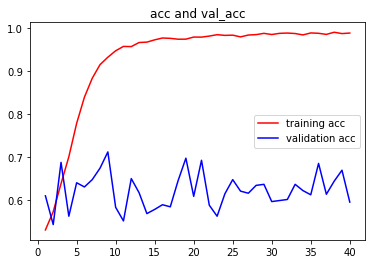

In [113]:
import matplotlib.pyplot as plt
plt.title('acc and val_acc')
plt.plot(epochs, acc, 'red', label='training acc')
plt.plot(epochs, val_acc, 'blue', label='validation acc')
plt.legend()#显示左上角的图例
plt.savefig("../img/Accuracy_ECT_16S.jpg")
plt.show()

In [114]:
# train loss 不断下降，test loss不断下降，说明网络仍在学习;（最好的）

# train loss 不断下降，test loss趋于不变，说明网络过拟合;（max pool或者正则化）

# train loss 趋于不变，test loss不断下降，说明数据集100%有问题;（检查dataset）

# train loss 趋于不变，test loss趋于不变，说明学习遇到瓶颈，需要减小学习率或批量数目;（减少学习率）

# train loss 不断上升，test loss不断上升，说明网络结构设计不当，训练超参数设置不当，数据集经过清洗等问题。（最不好的情况）

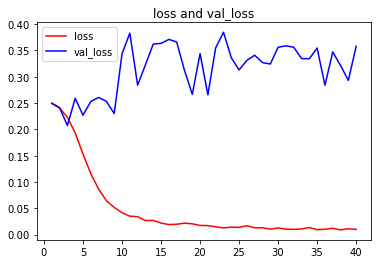

In [115]:
plt.title('loss and val_loss')
plt.plot(epochs, loss, 'red', label='loss')
plt.plot(epochs, val_loss, 'blue', label='val_loss')
plt.legend()
plt.savefig("../img/Loss_ECT_16S.jpg")
plt.show()

In [116]:
model.save('../model_save/'+model.name + "_ECT+16s_"+str(my_batch_size) + '_'+str(my_epochs)+'_'+str(my_validation_split)
           +'_'+str(acc_)[:8] + "_.h5")